In [29]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from collections import Counter

# Load CSV

In [30]:
path = 'data/udacity-object-dataset/'

In [31]:
df = pd.read_csv(os.path.join(path, 'labels.csv'), sep=' ', header=None, 
                 names=['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'occluded', 'label', 'attributes'])

In [32]:
df.head(20)

,filename,xmin,ymin,xmax,ymax,occluded,label,attributes
0,1478019952686311006.jpg,950,574,1004,620,0,car,NaN
1,1478019952686311006.jpg,1748,482,1818,744,0,pedestrian,NaN
2,1478019953180167674.jpg,872,586,926,632,0,car,NaN
3,1478019953689774621.jpg,686,566,728,618,1,truck,NaN
4,1478019953689774621.jpg,716,578,764,622,0,car,NaN
5,1478019953689774621.jpg,826,580,880,626,0,car,NaN
6,1478019953689774621.jpg,1540,488,1680,608,1,car,NaN
7,1478019953689774621.jpg,1646,498,1848,594,1,car,NaN
8,1478019954186238236.jpg,662,562,710,616,1,truck,NaN
9,1478019954186238236.jpg,686,576,730,628,0,car,NaN


# Look at the images

In [10]:
im = Image.open(path + '1478019952686311006.jpg')

In [11]:
im_data = np.array(im, dtype=np.uint8)

In [12]:
im_data.shape

(1200, 1920, 3)

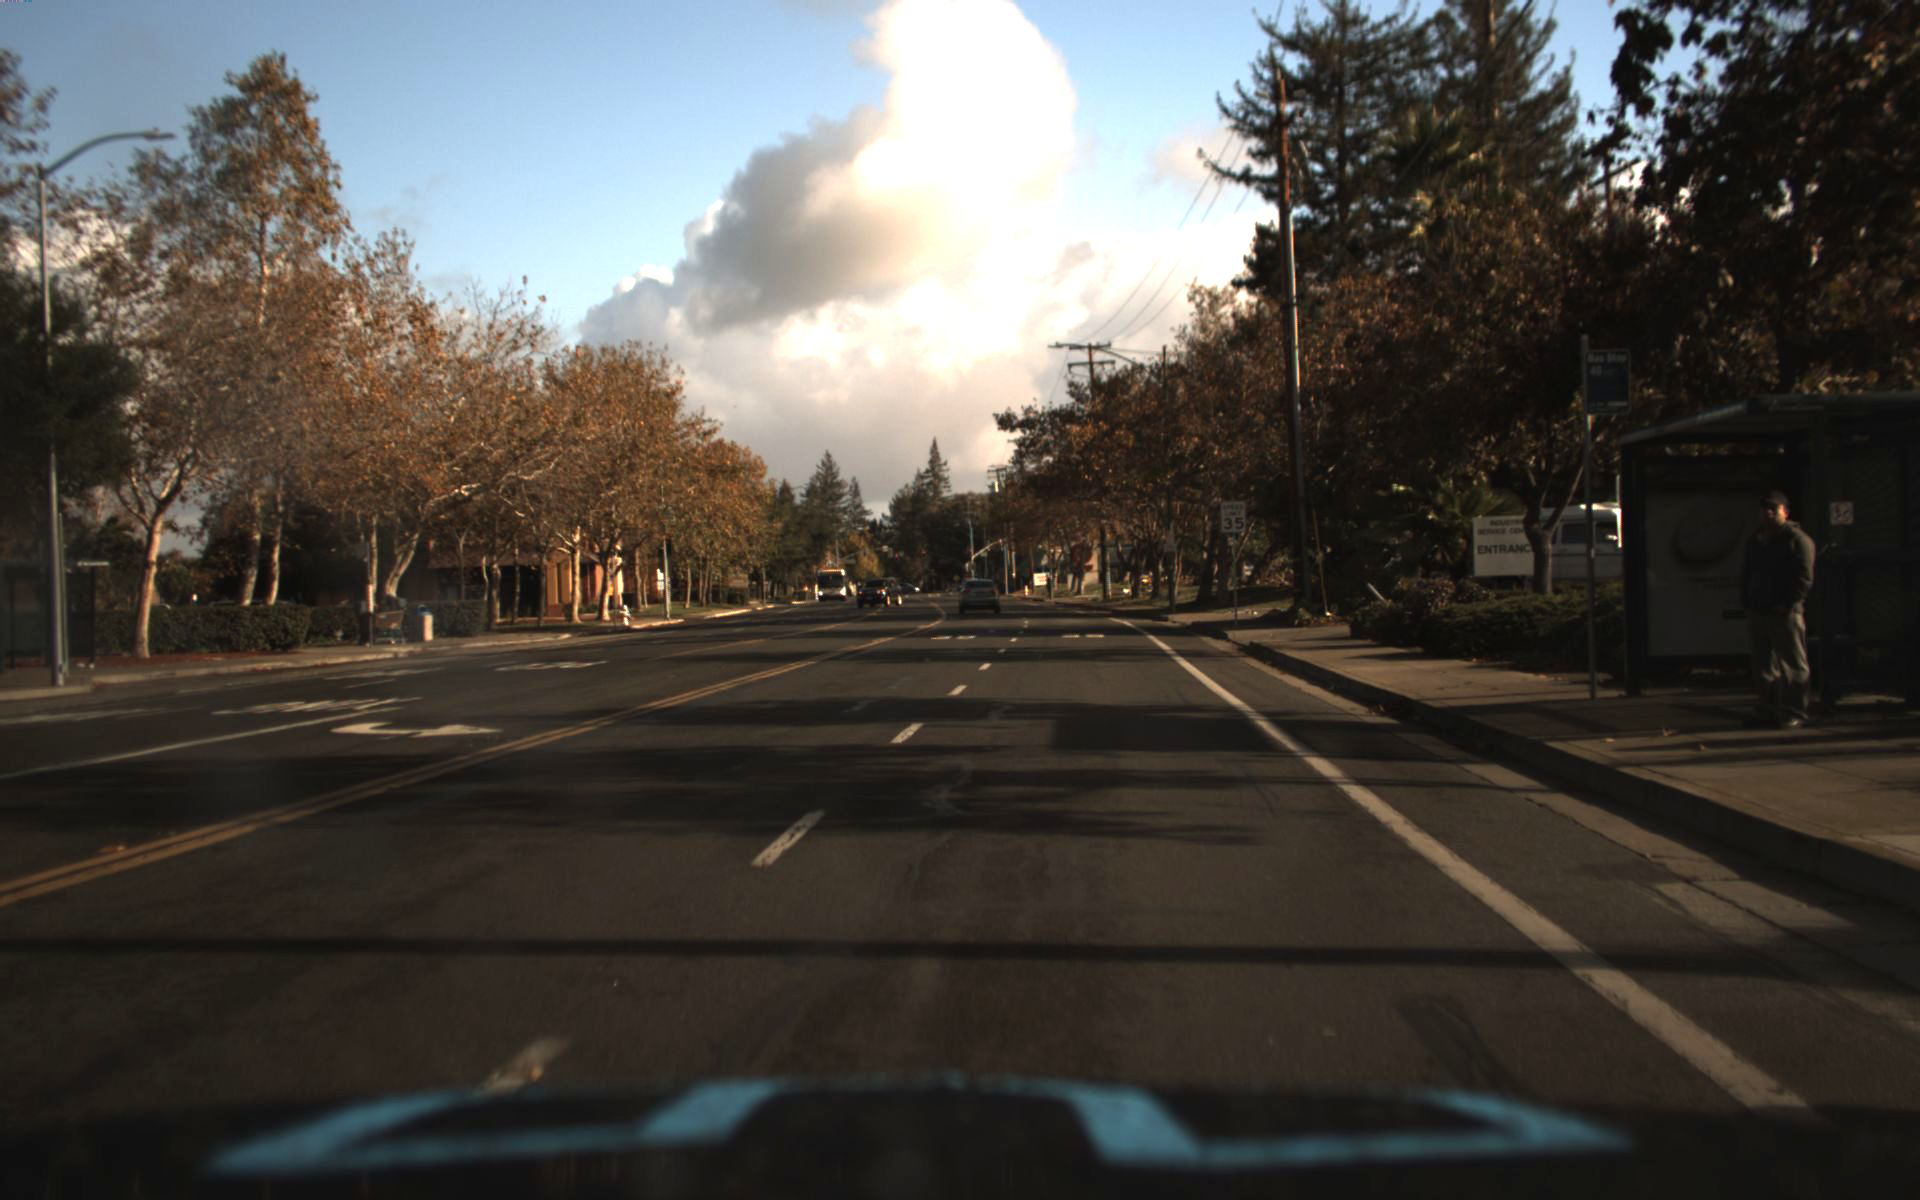

In [28]:
im

# List of classes

In [18]:
print(Counter(df['label']))

Counter({'car': 60788, 'trafficLight': 17253, 'pedestrian': 9866, 'truck': 3503, 'biker': 1676})


In [15]:
classes = list(set(df['label']))
class_ids = {c: i for i, c in enumerate(classes)}

In [16]:
classes

['biker', 'trafficLight', 'pedestrian', 'truck', 'car']

In [17]:
class_ids

{'biker': 0, 'car': 4, 'pedestrian': 2, 'trafficLight': 1, 'truck': 3}

Save the list of classes to a file

In [19]:
classes_path = path + 'classes.txt'
with open(classes_path, 'w') as f:
    f.write('\n'.join(classes))

# Convert the data frame into lists of numpy arrays

Convert the dataset into two lists:
- File names of images
- numpy arrays of boxes

Each image can have 0 or more boxes stored as a numpy array of shape (N, 5). Each row of the array is one box. Columns:
- class_id int
- x_min int
- y_min int
- x_max int
- y_max int

In [20]:
images = []
boxes = []

for filename, df_file in df.groupby(['filename']):
    images.append(filename)
    
    box = []
    for index, row in df_file.iterrows():
        x_min, y_min, x_max, y_max, label = row['xmin'], row['ymin'], row['xmax'], row['ymax'], row['label']
        class_id = class_ids[label]
        
        # Original boxes stored as 1D list of class, x_min, y_min, x_max, y_max.
        box.append(np.array([class_id, x_min, y_min, x_max, y_max], dtype=np.object))
        
    box = np.vstack(box)
    boxes.append(box)

In [21]:
len(images), len(boxes), images[0], boxes[0].shape

(13063, 13063, '1478019952686311006.jpg', (2, 5))

# Split into training and validation sets

In [22]:
train_split = 0.8
train_count = int(len(images) * train_split)

train_images = images[:train_count]
train_boxes = boxes[:train_count]
val_images = images[train_count:]
val_boxes = boxes[train_count:]

In [23]:
np.random.seed(42)

p = np.random.permutation(len(train_images))
train_images = np.array(train_images)[p]
train_boxes = np.array(train_boxes)[p]

p = np.random.permutation(len(val_images))
val_images = np.array(val_images)[p]
val_boxes = np.array(val_boxes)[p]

# Save into npz files

In [24]:
train_path = path + 'train.npz'
val_path = path + 'val.npz'

np.savez(train_path, images=train_images, boxes=train_boxes)
np.savez(val_path, images=val_images, boxes=val_boxes)